
Graph Theory Analysis for SCIFES Data 
============================================
### Groups (Pre-Mid-Post | FES-NFES)

####  1. Load important libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
# from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker

# /Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: 
#         FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. 
#             Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. 
#             Please import from 'nilearn.maskers' instead.
            
from nilearn.connectome import ConnectivityMeasure #communitymeasures
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.robust.scale import huber

import scipy.io
import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


####  2. Setup atlas, labels and review brain colormaps

Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


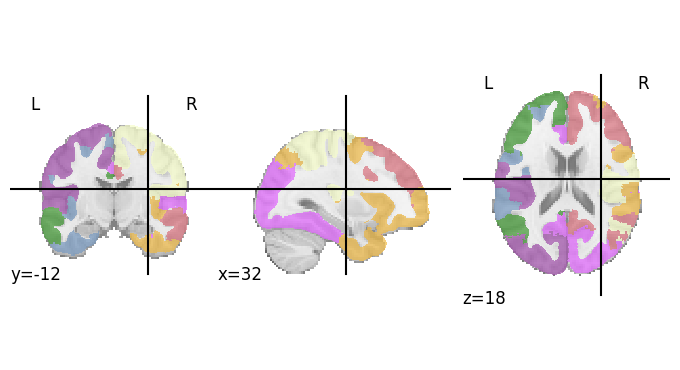

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

####  3. setup group labels for load funtional data 

In [3]:
#%% Load the functional datasets (pre mid post FES, NFES) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY


if analysis == "ALL":
    group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
    group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
#     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

elif analysis == "Group":
    group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


#### 4. Load fMRI data runs for each group, extract timeseries (ts) and save a copy.

In [4]:
#=============================================================================
ts_g1, ts_g2, ts_g3, ts_g4, ts_g5, ts_g6 = [], [], [], [], [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements
nii_g3 = sorted(os.listdir(data_path+'/'+ group[2]))
nii_g3 = [x for x in nii_g3 if x.startswith('errts')] # remove not-nifti elements
nii_g4 = sorted(os.listdir(data_path+'/'+ group[3]))
nii_g4 = [x for x in nii_g4 if x.startswith('errts')] # remove not-nifti elements
nii_g5 = sorted(os.listdir(data_path+'/'+ group[4]))
nii_g5 = [x for x in nii_g5 if x.startswith('errts')] # remove not-nifti elements
nii_g6 = sorted(os.listdir(data_path+'/'+ group[5]))
nii_g6 = [x for x in nii_g6 if x.startswith('errts')] # remove not-nifti elements


# reading the nifti files
for nii in nii_g1: # 1st session PreFES
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_FES dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # 1st session Pre_NFES
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_NFES dataset:'+'{}\n'.format(nii))
for nii in nii_g3: # 2nd session Mid_FES
    ts_g3.append(masker.fit_transform(data_path + '/'+ group[2] + '/'+ nii)) # ts_g3 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g4: # 2nd session Mid_FES
    ts_g4.append(masker.fit_transform(data_path + '/'+ group[3] + '/'+ nii)) # ts_g4 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_NFES dataset: '+'{}\n'.format(nii))
for nii in nii_g5: # 3rd session Post_FES
    ts_g5.append(masker.fit_transform(data_path + '/'+ group[4] + '/'+ nii)) # ts_g5 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g6: # 3rd session Post_NFES
    ts_g6.append(masker.fit_transform(data_path + '/'+ group[5] + '/'+ nii)) # ts_g6 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_NFES dataset:'+'{}\n'.format(nii))
    
# saving numpy arrays (timeseries)
# /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1], ts_g2)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2], ts_g3) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3], ts_g4) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4], ts_g5)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5], ts_g6)

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cac

[Memory]22.1s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes14a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]23.0s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]24.0s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_da

[Memory]43.6s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes03c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]44.5s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes03c.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]45.4s, 0.8min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes07c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_

[Memory]65.1s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes14c.r02.fanaticor+tlrc.nii.gz



#### 5. Compute correlation matrix for ts per runs and save a copy  

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

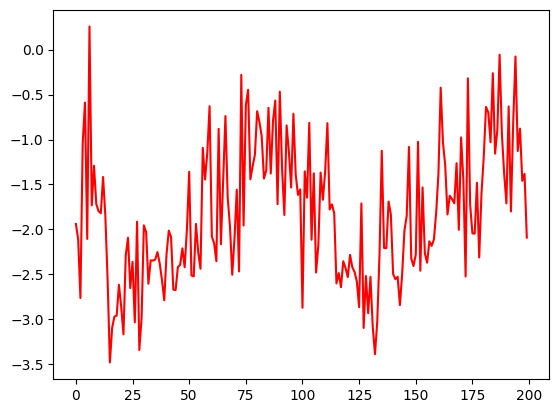

In [8]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
corr_g3 = corr_measure.fit_transform(ts_g3)
corr_g4 = corr_measure.fit_transform(ts_g4)
corr_g5 = corr_measure.fit_transform(ts_g5)
corr_g6 = corr_measure.fit_transform(ts_g6)
# Save arrays into a MATLAB-style .mat file for modularity

corr_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})
savemat(corr_path + 'corr_'+group[2]+'.mat', {'corr_'+group[2]: corr_g3})
savemat(corr_path + 'corr_'+group[3]+'.mat', {'corr_'+group[3]: corr_g4})
savemat(corr_path + 'corr_'+group[4]+'.mat', {'corr_'+group[4]: corr_g5})
savemat(corr_path + 'corr_'+group[5]+'.mat', {'corr_'+group[5]: corr_g6})

corr_data = {
    'corr_' + group[0]: corr_g1,
    'corr_' + group[1]: corr_g2,
    'corr_' + group[4]: corr_g5,
    'corr_' + group[5]: corr_g6,
}

# Save all into one .mat file
savemat(corr_path + 'corr_all_groups.mat', corr_data)

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
corr_g3_mean = np.mean(corr_g3, axis=0)
corr_g4_mean = np.mean(corr_g4, axis=0)
corr_g5_mean = np.mean(corr_g5, axis=0)
corr_g6_mean = np.mean(corr_g6, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))
bin_g3_mean = utils.binarize(utils.threshold_proportional(corr_g3_mean, thld, copy=True))
bin_g4_mean = utils.binarize(utils.threshold_proportional(corr_g4_mean, thld, copy=True))
bin_g5_mean = utils.binarize(utils.threshold_proportional(corr_g5_mean, thld, copy=True))
bin_g6_mean = utils.binarize(utils.threshold_proportional(corr_g6_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [9]:
print(f'{analysis} has ==> {len(ts_g1)}-{group[0]} & {len(ts_g2)}-{group[1]} & {len(ts_g3)}-{group[2]} & {len(ts_g4)}-{group[3]} & {len(ts_g5)}-{group[4]} & {len(ts_g6)}-{group[5]}')

ALL has ==> 14-pre_fes & 10-pre_nfes & 12-mid_fes & 10-mid_nfes & 14-post_fes & 10-post_nfes


In [8]:
# PreFES PreNFES PostFES id 0|1; 1|2; 4|5
# 3 6 7 5 7 4
# 3	PreFES	vs	PostFES
# 7	PreFES	vs	PreNFES

#### 6. FC visualization group level (weighted and binarized)  

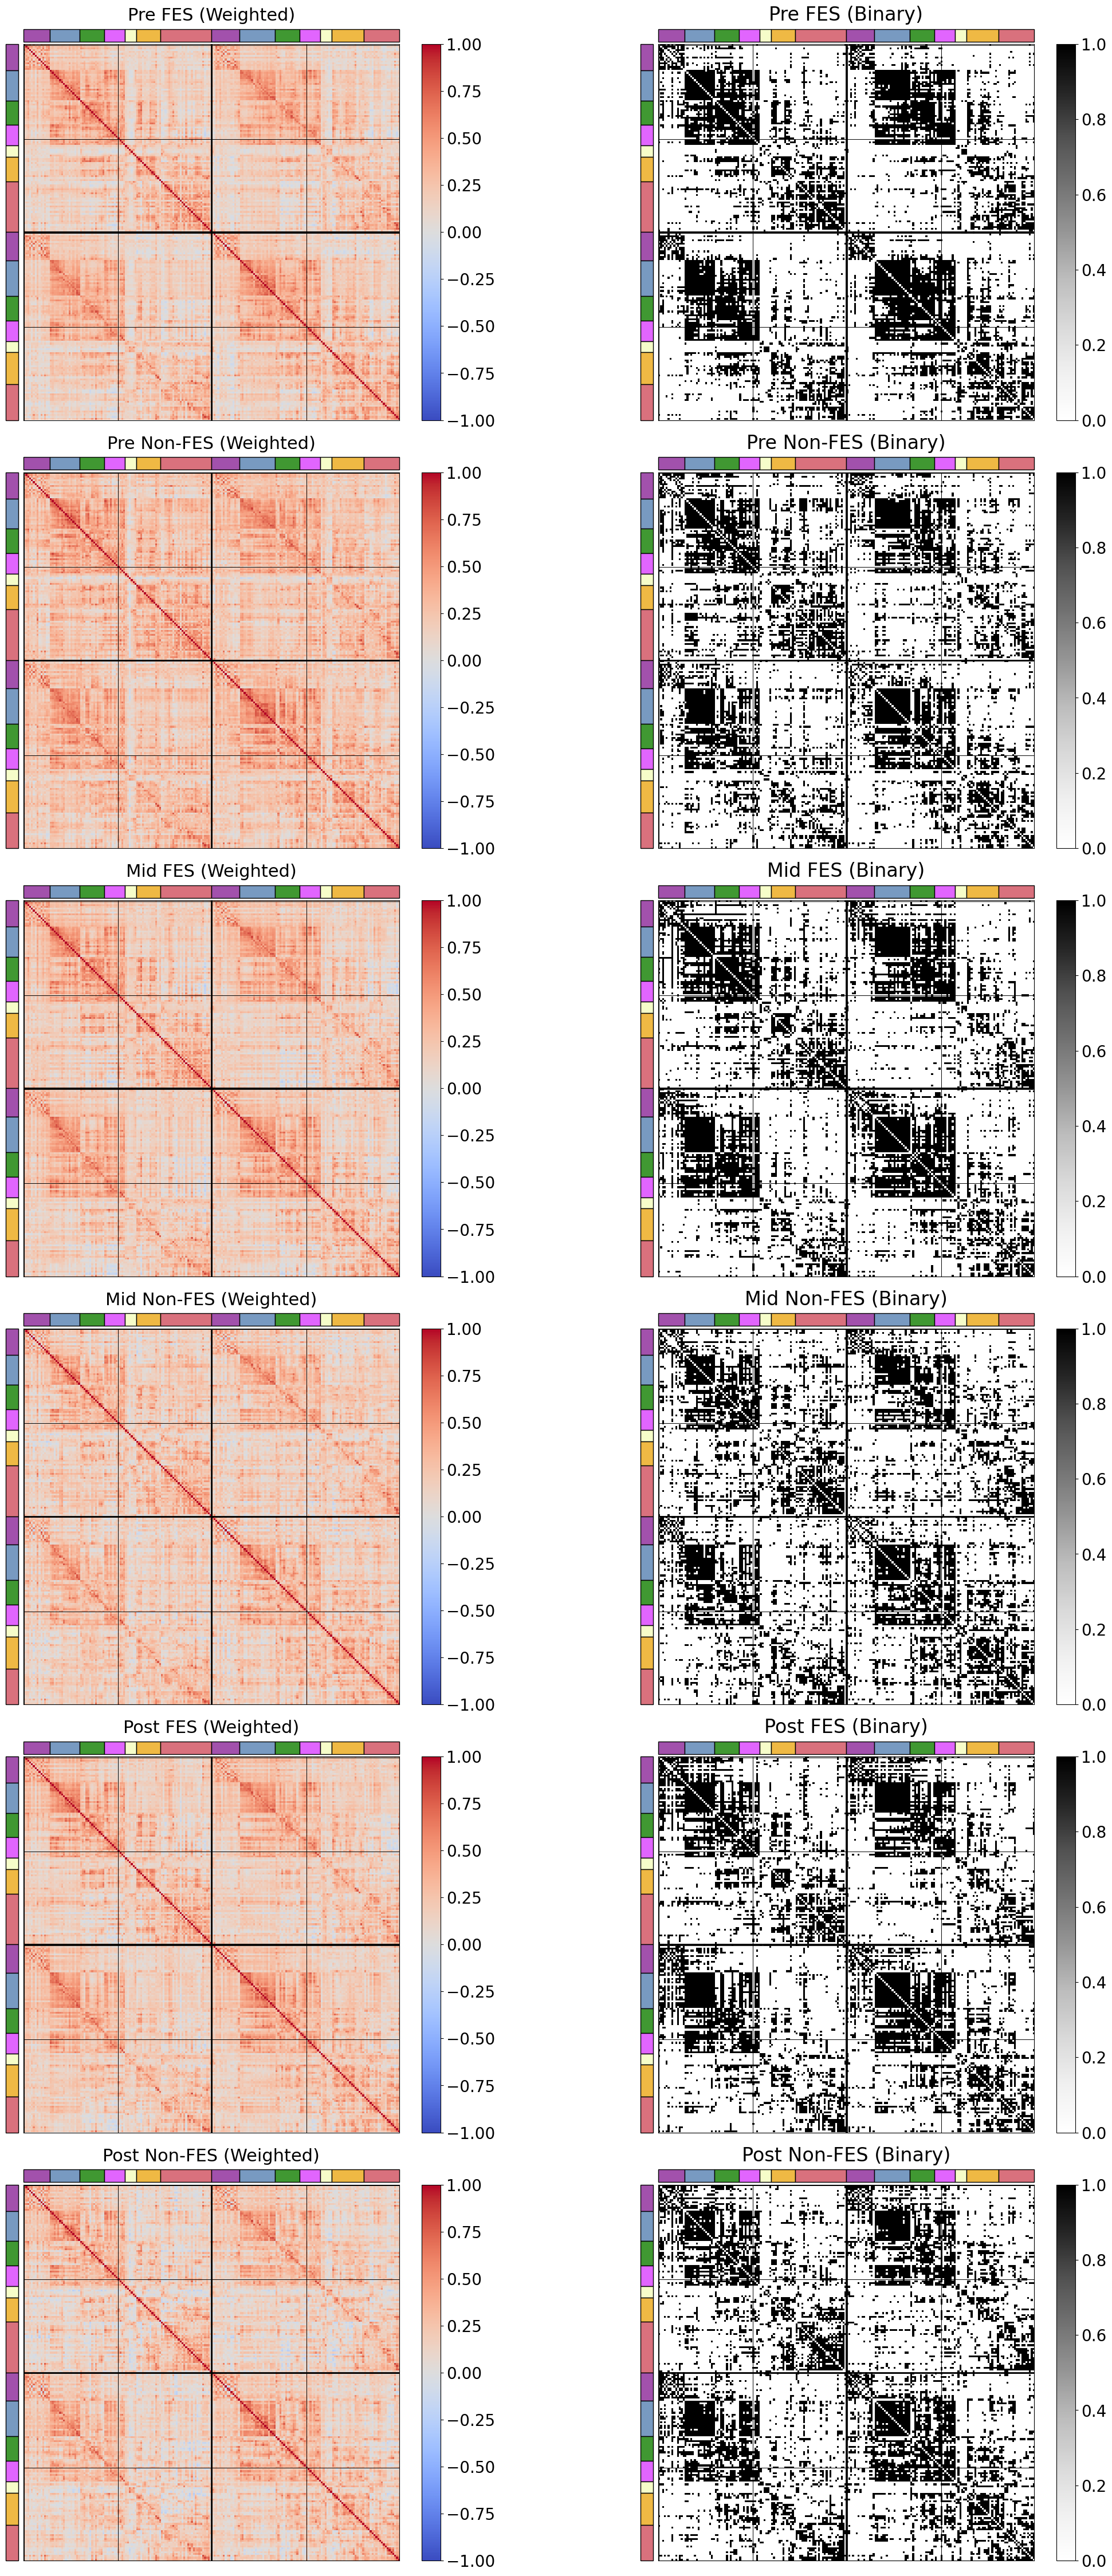

In [7]:
import matplotlib.patches as patches

# Define the number of rows and columns
nrows = 6
ncols = 2

# Create a 2-column by 6-row subplot figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))

# Assuming these are predefined matrices
data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]
group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']
# Loop over the rows and columns
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        
        if j == 0:  # Left column, weighted correlations
            ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='coolwarm') # twilight_shifted
            ax.set_title(f'{group_label[i]} (Weighted)', fontsize=22, y=1.04)

            # Customize ticks for weighted matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='coolwarm'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        else:  # Right column, binarized correlations
            ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys')
            ax.set_title(f'{group_label[i]} (Binary)', fontsize=24, y=1.04)

            # Customize ticks for binarized matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        # Draw grid lines
        ax.axvline(x=100-0.5, color='k', linewidth=2)
        ax.axhline(y=100-0.5, color='k', linewidth=2)
        ax.grid(color='black', linestyle='-', linewidth=0.7)

        # Disable ticks and labels
        ax.tick_params(
            axis='both',       # changes apply to the x,y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

        # Add rectangle objects as tick labels (X axis)
        xmin, xmax, ymin, ymax = ax.axis()
        xy = split[:-1]  # anchor points
        h = (ymax - ymin) / 30
        space = h / 5
        intercept = ymax + space  # intercept
        w = split[1:] - xy  # rectangle width(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

        # Add rectangle objects as tick labels (Y axis)
        width = (ymax - ymin) / 30
        h = split[1:] - xy  # rectangle height(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the entire figure with subplots
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_weighted_bin.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_corr_bin.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Show the plot
plt.show()


In [8]:
# print(f'MinMax weighted: {np.min(corr_g1_mean), np.min(corr_g2_mean), np.max(corr_g1_mean), np.max(corr_g2_mean)}\nMinMax Binary: {np.min(bin_g1_mean), np.min(bin_g2_mean), np.max(bin_g1_mean), np.max(bin_g2_mean)} ')
# # corr_g1_mean bin_g1_mean

In [8]:
# plt.show() 

In [9]:
group_label = ['Pre FES', 'Pre Sham', 'Post FES', 'Post Sham']

#### 8. Load community labels and compute allegiance, integration and recruitment coefficients (Using nilearn connectome, Connectivity Measure) 

In [44]:
# #%% MODULARITY
# n_set = 4
# # 200xn

# ## Lee etal Method
# # S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g1_gamma.mat', squeeze_me=True)['N_all_g1']; #PreFES 
# # S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g2_gamma.mat', squeeze_me=True)['N_all_g2']; #PreSham 
# # S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g3_gamma.mat', squeeze_me=True)['N_all_g3']; #PostFES
# # S_g4 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g4_gamma.mat', squeeze_me=True)['N_all_g4']; #PostSham

# # # Our method

# # S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prefes.mat', squeeze_me=True)['S_g1'];  
# # S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prenfes.mat', squeeze_me=True)['S_g2'];  
# # S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_postfes.mat', squeeze_me=True)['S_g3'];
 
# communities = [S_g1, S_g2, S_g3, S_g4]
# # communities = [S_g1_mode, S_g2_mode, S_g3_mode]

# S1_cFES_pre = S_g1
# S2_c_pre = S_g2
# S3_cFES_post = S_g3
# S4_c_post = S_g4

In [10]:

n_set = 4
S_g = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g_gamma.mat', squeeze_me=True)['N_all_g']; #all group


In [11]:
# Separation into group 1, 2, 3, 4 of FES-Pre, c-Pre, FES-Post, c-Post [1-48]
selected_indices1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13] #14
selected_indices2 = [14,15,16,17,18,19,20,21,22,23] #10
selected_indices3 = [24,25,26,27,28,29,30,31,32,33,34,35,36,37] #14
selected_indices4 = [38,39,40,41,42,43,44,45,46,47] #10

# 14-pre_fes & 10-pre_nfes & 14-post_fes & 10-post_nfes

S1_cFES_pre = S_g[:, selected_indices1]
S2_c_pre = S_g[:, selected_indices2]
S3_cFES_post = S_g[:, selected_indices3]
S4_c_post = S_g[:, selected_indices4] # 200x10 | 200x1

communities = [S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post]

print(f'Selection: {S1_cFES_pre.shape} {S2_c_pre.shape} {S3_cFES_post.shape} {S4_c_post.shape}')  # Output shape will be (200, 4) in this case

Selection: (200, 14) (200, 10) (200, 14) (200, 10)


In [12]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings
# group_label = ['Pre FES', 'Post FES', 'Pre NFES']
# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) 

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()
# 1=pre_fes; 2=pre_nfes; 3=post_fes

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc




In [13]:
# def perm_test_integration(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         k += diff < np.abs(int_sp2 - int_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         k += diff < np.abs(rec_sp2 - rec_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# run for a given permutation number (nmc) var_s1 var_s2 var_s3
# pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) ## Int PreFES - PreNFES
# pvalue_int1 = perm_test_integration(S_g1, S_g3, nmc=20000) ## Int PreFES - PostFES
# pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## Rec PreFES - PreNFES
# pvalue_rec1 = perm_test_recruitment(S_g1, S_g3, nmc=20000) ## ## Rec PreFES - PostFES
# pvalue_int1 --> 200x200
 
# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

In [14]:
# import numpy as np
# from joblib import Parallel, delayed

# # # # Get the number of available CPU cores
# # n_jobs = multiprocessing.cpu_count()
# # print(f'Using all {n_jobs} cpu(s)!')
# def perm_test_integration(s1, s2, nmc):
#     n = np.shape(s1)[1]
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)

#     def process_permutation(i):
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:, :n], sp[:, n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         result = (diff < np.abs(int_sp2 - int_sp1)).astype(int)
        
#         if i % 10 == 0:
#             print(f'permutation #: {i}')
            
#         return result

#     results = Parallel(n_jobs=-1)(delayed(process_permutation)(i) for i in range(nmc))
#     return sum(results) / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n = np.shape(s1)[1]
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)

#     def process_permutation(i):
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:, :n], sp[:, n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         result = (diff < np.abs(rec_sp2 - rec_sp1)).astype(int)
        
#         if i % 10 == 0:
#             print(f'permutation #: {i}')
            
#         return result

#     results = Parallel(n_jobs=-1)(delayed(process_permutation)(i) for i in range(nmc))
#     return sum(results) / nmc

In [15]:
print(f'Done!')

Done!


#### 11. Slice SMN region from 200 regions to 35 regions (LH/RH) and save. 

In [17]:
# PreFES vs PostFES
# rec int coeff.
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/recruitment_cFES_pre.npy', recruitment[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/integration_cFES_pre.npy', integration[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/recruitment_c_pre.npy', recruitment[1])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/integration_c_pre.npy', integration[1])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/recruitment_cFES_post.npy', recruitment[2])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/integration_cFES_post.npy', integration[2])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/recruitment_c_post.npy', recruitment[3])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/integration_c_post.npy', integration[3])

# alg
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/allegiance_cFES_pre.npy', allegiance[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/allegiance_c_pre.npy', allegiance[1])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/allegiance_cFES_post.npy', allegiance[2])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/allegiance_c_post.npy', allegiance[3])
# corr mxt
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/corr_cFES_pre.npy', corr_g1_mean)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/corr_c_pre.npy', corr_g2_mean)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/corr_cFES_post.npy', corr_g5_mean)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/corr_c_post.npy', corr_g6_mean)

# Community label assigment 

np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/S_g1_cFES_pre.npy', S1_cFES_pre)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/S_g2_c_pre.npy', S2_c_pre)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/S_g3_cFES_post.npy', S3_cFES_post)
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/S_g4_c_post.npy', S4_c_post)

print(f'File saved!')

File saved!


In [1]:
# # Load the data from the .npy files
# os.chdir('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/')
# cFES_pre_rec = np.load('recruitment_cFES_pre.npy')
# cFES_pre_int = np.load('integration_cFES_pre.npy')

# c_pre_rec = np.load('recruitment_c_pre.npy')
# c_pre_int = np.load('integration_c_pre.npy')

# cFES_post_rec = np.load('recruitment_cFES_post.npy')
# cFES_post_int = np.load('integration_cFES_post.npy')

# c_post_rec = np.load('recruitment_c_post.npy')
# c_post_int = np.load('integration_c_post.npy')


# alg_cFES_pre = np.load('allegiance_cFES_pre.npy')
# alg_c_pre = np.load('allegiance_c_pre.npy')

# alg_cFES_post = np.load('allegiance_cFES_post.npy')
# alg_c_post = np.load('allegiance_c_post.npy')

# # corr_prefes, corr_presham, corr_postfes, corr_postsham
# corr_cFES_pre = np.load('corr_cFES_pre.npy')
# corr_c_pre = np.load('corr_c_pre.npy')

# corr_cFES_post = np.load('corr_cFES_post.npy')
# corr_c_post = np.load('corr_c_post.npy')


# print(corr_cFES_pre.shape)
# # cFES_pre', 'cFES_post', 'c_pre', 'c_post'

### Statistical tests

In [2]:
# s1 = corr_g1_mean[14:30, :]  
# s2 = corr_g1_mean[115:134, :]
# FC_PreFES_SMN = np.vstack((s1, s2))
# print(f'FC SMN PreFES: {FC_PreFES_SMN.shape}') 

In [3]:
# corr_a = corr_prefes
# corr_b = corr_postfes

# # corr_a = corr_presham
# # corr_b = corr_postsham

# # corr_a = corr_prefes
# # corr_b = corr_presham

# s1 = corr_a[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_a[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_a[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix PreFES:", fc_smn_matrix_a.shape)

# # PostFES | PostNFES | PreNFES
# # Slice rows and columns from 15:31 and 116:135
# s1 = corr_b[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_b[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_b[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix PreSham:", fc_smn_matrix_b.shape)


# # *************
# x_rec = prefes_rec
# z_rec = postfes_rec
# x_in = prefes_int
# z_in = postfes_int

# # presham-postsham
# # x_rec = presham_rec
# # z_rec = postsham_rec
# # x_in = presham_int
# # z_in = postsham_int

# # prefes-presham
# # x_rec = prefes_rec
# # z_rec = presham_rec
# # x_in = prefes_int
# # z_in = presham_int

# slice1 = x_rec[14:30]   
# slice2 = x_rec[115:134]  
# x_rec_SMN = np.concatenate((slice1, slice2))
# print(x_rec_SMN.shape) 

# slice1 = z_rec[14:30]   
# slice2 = z_rec[115:134]  
# z_rec_SMN = np.concatenate((slice1, slice2))
# print(z_rec_SMN.shape) 

# slice1 = x_in[14:30]   
# slice2 = x_in[115:134]  
# x_in_SMN = np.concatenate((slice1, slice2))
# print(x_in_SMN.shape) 

# slice1 = z_in[14:30]   
# slice2 = z_in[115:134]  
# z_in_SMN = np.concatenate((slice1, slice2))
# print(z_in_SMN.shape)



In [4]:
# # S1_prefes, S2_presham, S3_postfes, S4_postsham
# S1_a = S1_prefes
# S1_b = S3_postfes

# # S1_a = S2_presham
# # S1_b = S4_postsham

# # S1_a = S1_prefes
# # S1_b = S2_presham

# slice1 = S1_a[14:30, :]  
# slice2 = S1_a[115:134, :] 
# S1_a_SMN = np.vstack((slice1, slice2))
# print(f'SMN PreFES shape: {S1_a_SMN.shape}') 

# slice1 = S1_b[14:30, :]  
# slice2 = S1_b[115:134, :] 
# S1_b_SMN = np.vstack((slice1, slice2))
# print(f'SMN PostFES shape: {S1_b_SMN.shape}') 

In [5]:
# # SMN Perm-test PreFES - PostFES
# static_communities = np.zeros((35,))
# pvalue_int1 = perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000) ##  
# pvalue_rec1 = perm_test_recruitment(S1_a_SMN, S1_b_SMN, nmc=20000) ##

In [6]:
# print("pvalue_int1:", pvalue_int1.shape)

#### 12. Plot brain glass visualization (significant regions of recruitment and integration coefficients)  

In [7]:
# # diff_rec_abs1 = abs(prefes_rec - postfes_rec)
# # diff_int_abs1 = abs(prefes_int - postfes_int)

# # diff_rec_abs1 = abs(presham_rec - postsham_rec)
# # diff_int_abs1 = abs(presham_int - postsham_int)

# diff_rec_abs1 = abs(prefes_rec - presham_rec)
# diff_int_abs1 = abs(prefes_int - presham_int)

# # prefes_rec prefes_int presham_rec presham_int postfes_rec postfes_int postsham_rec postsham_int

# diff_rec1 = diff_rec_abs1 
# diff_int1 = diff_int_abs1 
# idx = 0
# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         # Proceed with plotting only if the lengths of arrays match and they are not empty
#         # idx=idx+1
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
#         view.open_in_browser()
#         view.save_as_html(output_path)

#     else:
#         print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
#               f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
#         # idx=idx+1
        
# color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']
# # Recruitment pre-post
# sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
# sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# # coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# # color_g2 = [color[i] for i in sig_rec2]
# # size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
# idx=idx+1
# plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# # color_gb

# # Integration pre-post
# sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
# filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
# coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
# color_g4 = [color[i] for i in filtered_sig_int4]
# size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

# idx = idx+1
# plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# # View 1 = Rec PreFES vs PostFES
# # View 2 = Int PreFES vs PostFES

In [8]:
# x_rec z_rec x_in z_in
# print(f' shape :{(x_rec.shape)} {(z_rec.shape)}, type :{type(x_in)} {type(z_in)}')

In [9]:
# # diff_rec = diff_rec_abs
# diff_rec1 = diff_rec_abs1
# # diff_int = diff_int_abs
# diff_int1 = diff_int_abs1 
# idx = 0

# lime = (0, 1, 1)
# cyan = (0, 1, 0)


# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         # Proceed with plotting only if the lengths of arrays match and they are not empty
#         # idx=idx+1
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
#         view.open_in_browser()
#         view.save_as_html(output_path)

#     else:
#         print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
#               f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
#         # idx=idx+1

        
# # color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
# #               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
# color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']
        
# # Recruitment 1-3
# sig_rec2 = np.where((diff_rec1 >= 0.0))[0]  
# sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
# idx=idx+1
# plot_markers(coords_g2, color_gb, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# # Integration 1-3
# sig_int4 = np.where((diff_int1 >= 0.0))[0]  
# filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
# coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
# color_g4 = [color[i] for i in filtered_sig_int4]
# size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]


# idx = idx+1
# plot_markers(coords_g4, color_gb, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# # View # = Rec PreFES vs PreNFES
# # View # = Rec PreFES vs PostFES
# # View # = Int PreFES vs PreNFES
# # View # = Int PreFES vs PostFES

In [10]:
# pvalue_int1

In [11]:
# print(f'Sign Diff Rec1-3:  {len(sig_rec2)}') #{len(sig_rec2)} \nSign Diff Rec1-3:
# print(f'Sign Diff Int1-3:  {len(sig_int4)}') #{len(sig_int4)} \nSign Diff Int1-3: 

# # print(f'\n\ncord/color/size1: {len(coords_g1)} -{len(color_g1)} - {len(size_g1)}')
# print(f'cord/color/size2: {len(coords_g2)} -{len(color_g2)} - {len(size_g2)}')
# # print(f'cord/color/size3: {len(coords_g3)} -{len(color_g3)} - {len(size_g3)}')
# print(f'cord/color/size4: {len(coords_g4)} -{len(color_g4)} - {len(size_g4)}')


#### 13. Plot SMN region scatter plot 

In [12]:
# ## Scartered Plots
# x_r1 = [x for x, p in zip(diff_rec1, pvalue_rec1) if ((x >= 0.2) or (x <= -0.2)) and (p == 0)]
# # print(f'sigDiff_rec1: {x_r1}\n {len(x_r1)} {len(x_rec_SMN)}' )
# indices = [i for i, (x, p) in enumerate(zip(diff_rec1, pvalue_rec1)) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
# for idx in indices:
#     print(f'Corresponding value in x_rec[{idx}]: {x_rec_SMN[idx]}-{z_rec_SMN[idx]}') 

# x_i1 = [x for x, p in zip(diff_int1, pvalue_int1) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
# indices1 = [i for i, (x, p) in enumerate(zip(diff_int1, pvalue_int1)) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
# # print(f'\n\nsigDiff_int1: {x_i1}\n {len(x_i1)} {len(x_in_SMN)}')
# for idx in indices1:
#     print(f'Corresponding value in x_in[{idx}]: {x_in_SMN[idx]}-{z_in_SMN[idx]}') 


# df1 = pd.DataFrame({'Rec_prefes': x_rec_SMN, 'Rec_postfes': z_rec_SMN, 'Pvalue_rec':pvalue_rec1})
# file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output3rec_smn.xlsx"
# df1.to_excel(file_path, index=False)


# dfi1 = pd.DataFrame({'Int_prefes': x_in_SMN, 'Int_postfes': z_in_SMN, 'Pvalue_int':pvalue_int1})
# file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output3in_smn.xlsx"
# dfi1.to_excel(file_path, index=False)




### Prepare directionality plots

In [13]:
# from matplotlib.ticker import FormatStrFormatter

# excel_file = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/matrix_fes_smn_new.xlsx'
# r_col_names3 = ['PreFES_Rec_Sign_plot', 'PostFES_Rec_Sign_plot', 'Rec_Fnets_plot', 'Rec_Fnet_color']
# i_col_names3 = ['PreFES_Int_Sign_plot', 'PostFES_Int_Sign_plot', 'Int_Fnets_plot', 'Int_Fnet_color'] 
 
# r_df3 = pd.read_excel(excel_file, sheet_name='Rec_1-3_SMN', usecols=r_col_names3)
 
# i_df3 = pd.read_excel(excel_file, sheet_name='Int_1-3_SMN', usecols=i_col_names3)

# # Rec
# x_rec3 = r_df3['PreFES_Rec_Sign_plot'].tolist()
# z_rec3 = r_df3['PostFES_Rec_Sign_plot'].tolist()
# r_fn3 = r_df3['Rec_Fnets_plot'].tolist()
# r_fnc3 = r_df3['Rec_Fnet_color'].tolist()

# # Int

# x_in3 = i_df3['PreFES_Int_Sign_plot'].tolist()
# z_in3 = i_df3['PostFES_Int_Sign_plot'].tolist()
# i_fn3 = i_df3['Int_Fnets_plot'].tolist()
# i_fnc3 = i_df3['Int_Fnet_color'].tolist()


In [14]:
# # x_rec z_rec x_in z_in
# print(f' shape: {len(x_rec3)} {len(z_rec3)}, {len(x_in3)} {len(z_in3)}')

# x_rec3 = x_rec3[:35]
# z_rec3 = z_rec3[:35]
# x_in3 = x_in3[:35]
# z_in3 = z_in3[:35]

# print(f' reshape: {len(x_rec3)} {len(z_rec3)}, {len(x_in3)} {len(z_in3)}')

In [15]:
# from matplotlib.ticker import FormatStrFormatter


# label = [
#     'VN',
#     'SMN',
#     'DAN',
#     'VAN',
#     'LN',
#     'FPN',
#     'DMN'
# ]

# color_rgb = {
#     "purple": (128/255, 0, 128/255),
#     "blue": (0, 0, 255/255),
#     "green": (0, 128/255, 0),
#     "violet": (238/255, 130/255, 238/255),
#     "moccasin": (255/255, 228/255, 181/255),
#     "orange": (255/255, 165/255, 0),
#     "red": (255/255, 0, 0),
#     "lime": (0, 1, 0),
#     "cyan": (0, 1, 1)
# }

# r_fn1 = ["DAN", "VN"]
# r_fn1 = list(set(r_fn1))

# r_fnc1 = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']
# r_fnc1 = [color_rgb[color] for color in r_fnc1]

# # r_fnc3 = ['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'violet', 'purple', 'purple']
# # r_fnc3 = [color_rgb[color] for color in r_fnc3]

# i_fn1 = ["DAN"]
# i_fn1 = list(set(i_fn1))

# i_fnc1 = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']
# i_fnc1 = [color_rgb[color] for color in i_fnc1]
 

# # i_fnc3 = ['violet']
# # i_fnc3 = [color_rgb[color] for color in i_fnc3]

# scatter_kws_rec1 = {"color": r_fnc1, "s": 200}
# # scatter_kws_rec2 = {"color": r_fnc2, "s": 200}
# # scatter_kws_rec3 = {"color": r_fnc3, "s": 200}

# scatter_kws_int1 = {"color": i_fnc1, "s": 200}
# # scatter_kws_int2 = {"color": i_fnc2, "s": 200}
# # scatter_kws_int3 = {"color": i_fnc3, "s": 200}



# # fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/DirectionalityPlotsmn_nfes'+analysis+'.png',
# #              format='png', dpi=300)

In [16]:
# group_label = ['Pre FES', 'Pre Sham'] # 'Pre FES', 'Pre Sham', 'Post FES', 'Post Sham'

In [17]:
# "/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_90469/1330299923.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
#   ax1.set_yticklabels(ylabels, size=20)"

In [18]:
# fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
# sns.set(style='white')

# # Recruitment 1-3
# sns.regplot(x=x_rec3, y=z_rec3, ci=95, scatter_kws=scatter_kws_rec1, 
#             line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
# ax1.set_xlabel(group_label[0], fontsize=24)
# ax1.set_ylabel(group_label[1], fontsize=24)
# ax1.set_title('Recruitment Coefficient', fontsize=30)

# # Ensure min/max and intervals are the same for both axes
# lims = [0.4, 0.90]
# ax1.set_xlim(lims)
# ax1.set_ylim(lims)
# ax1.set_aspect('equal', adjustable='box')
# ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax1.tick_params(axis='both', labelsize=20)

# # Integration 1-3
# sns.regplot(x=x_in3, y=z_in3, ci=95, scatter_kws=scatter_kws_int1, 
#             line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
# ax2.set_xlabel(group_label[0], fontsize=24)
# ax2.set_ylabel(group_label[1], fontsize=24)
# ax2.set_title('Integration Coefficient', fontsize=30)

# lims1 = [0.20, 0.35]
# ax2.set_xlim(lims1)
# ax2.set_ylim(lims1)
# ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
# ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.tick_params(axis='both', labelsize=20)

# # Customize spines
# for ax in [ax1, ax2]:
#     for location in ['left', 'right', 'top', 'bottom']:
#         ax.spines[location].set_linewidth(5)

# plt.grid(False)
# plt.rcParams["axes.grid"] = False
# plt.tight_layout(pad=2.0)
# plt.show()

In [19]:
# S1_a = S1_prefes
# S1_b = S3_postfes

# # S1_a = S2_presham
# # S1_b = S4_postsham

# # S1_a = S1_prefes
# # S1_b = S2_presham

In [20]:
# # S1_prefes, S2_presham, S3_postfes, S4_postsham 
# slice1 = S1_prefes[14:30, :]  
# slice2 = S1_prefes[115:134, :] 
# S1_prefes_SMN = np.vstack((slice1, slice2))
# print(f'SMN PreFES shape: {S1_prefes_SMN.shape}') 

# slice1 = S3_postfes[14:30, :]  
# slice2 = S3_postfes[115:134, :] 
# S3_postfes_SMN = np.vstack((slice1, slice2))
# print(f'SMN PostFES shape: {S3_postfes_SMN.shape}') 

In [21]:
# # S1_prefes, S2_presham, S3_postfes, S4_postsham 
# slice1 = S2_presham[14:30, :]  
# slice2 = S2_presham[115:134, :] 
# S2_presham_SMN = np.vstack((slice1, slice2))
# print(f'SMN PreSham shape: {S2_presham_SMN.shape}') 

# slice1 = S4_postsham[14:30, :]  
# slice2 = S4_postsham[115:134, :] 
# S4_postsham_SMN = np.vstack((slice1, slice2))
# print(f'SMN PostSham shape: {S4_postsham_SMN.shape}') 

#### 14. Computer permutations test for allegiance PreFES vs PostFES and save the p-value output.  

In [22]:
# from joblib import Parallel, delayed

# def perm_test_allegiance(s1, s2, nmc):
#     n = np.shape(s1)[1]
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)

#     def process_permutation(i):
#         # Perform permutation and comparison
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:, :n], sp[:, n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         result = (diff < np.abs(alg_sp2 - alg_sp1)).astype(int)
        
#         # Progress reporting (every 10 permutations)
#         if i % 10 == 0:
#             print(f'permutation #: {i}')
            
#         return result

#     # Parallel execution using all available cores
#     results = Parallel(n_jobs=-1)(delayed(process_permutation)(i) for i in range(nmc))
    
#     return sum(results) / nmc


# from scipy.stats import rankdata


# import numpy as np
# from scipy.stats import rankdata

# def perm_test_friedman(pre_labels, post_labels, nmc):
#     """
#     Permutation-based Friedman test to detect pre-post differences in brain functional connectivity
#     for spinal cord injury (SCI) intervention data.

#     Parameters:
#     - pre_labels: np.array of shape (R, S), where R=regions, S=subjects (Pre-intervention)
#     - post_labels: np.array of shape (R, S) (Post-intervention)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_values: np.array of shape (R, R) = matrix of p-values per region pair
#     """
#     R, S = pre_labels.shape
#     alg_pre = communitymeasures.allegiance(pre_labels)   # (R, R)
#     alg_post = communitymeasures.allegiance(post_labels) # (R, R)

#     # Stack data for real Friedman computation
#     data_stack = np.stack([alg_pre, alg_post], axis=0)  # (2, R, R)

#     # Compute observed Friedman statistic for each pair
#     chi2_obs = np.zeros((R, R))
#     for i in range(R):
#         for j in range(R):
#             values = np.array([alg_pre[i, j], alg_post[i, j]])  # Two-condition
#             ranks = rankdata(values)
#             mean_ranks = np.mean(ranks)
#             chi2 = (12 * 1 / (2 * 3)) * np.sum((ranks - 1.5) ** 2)  # 1 subject (aggregated allegiance)
#             chi2_obs[i, j] = chi2

#     # Permutation loop
#     exceedances = np.zeros((R, R))
#     for it in range(nmc):
#         # Permute subject-level community assignments
#         permuted = pre_labels.copy()
#         flip_mask = np.random.rand(S) < 0.5
#         permuted[:, flip_mask] = post_labels[:, flip_mask]
#         permuted_post = post_labels.copy()
#         permuted_post[:, flip_mask] = pre_labels[:, flip_mask]

#         alg_perm_pre = communitymeasures.allegiance(permuted)
#         alg_perm_post = communitymeasures.allegiance(permuted_post)

#         for i in range(R):
#             for j in range(R):
#                 values = np.array([alg_perm_pre[i, j], alg_perm_post[i, j]])
#                 ranks = rankdata(values)
#                 mean_ranks = np.mean(ranks)
#                 chi2_perm = (12 * 1 / (2 * 3)) * np.sum((ranks - 1.5) ** 2)

#                 if chi2_perm >= chi2_obs[i, j]:
#                     exceedances[i, j] += 1

#         if it % 10 == 0:
#             print(f'Permutation #: {it}')

#     # Compute empirical p-values
#     p_values = exceedances / nmc
#     return p_values


# # pvalue_int1 = perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000) ##  
# # pvalue_rec1 = perm_test_recruitment(S1_a_SMN, S1_b_SMN, nmc=20000) ##

In [23]:
# alg_pvalue = perm_test_friedman(S1_a, S1_b, nmc=20000)
# print(f'Shape pvalue: {alg_pvalue.shape} {S1_a.shape} {S1_b.shape}')

In [24]:
# #  S1_prefes_SMN S3_postfes_SMN S2_presham_SMN S4_postsham_SMN
# # S1_prefes, S2_presham, S3_postfes, S4_postsham 

# alg_pvalue = perm_test_allegiance(S1_a, S1_b, nmc=20000)
# print(f'Shape pvalue: {alg_pvalue.shape} {S1_a.shape} {S1_b.shape}')
# # S1_prefes

#### 15.  Plot allegiance matric all regions 

In [25]:
# # alg_prefes alg_prenfes alg_postfes alg_postnfes 
# alg_prefes = np.nan_to_num(alg_prefes, nan=0)
# alg_prenfes = np.nan_to_num(alg_prenfes, nan=0)
# alg_postfes = np.nan_to_num(alg_postfes, nan=0)
# alg_postnfes = np.nan_to_num(alg_postnfes, nan=0)

# def huber_mean_mad_alg(alg_value1, alg_value2):
#     mu1, _ = huber(alg_value1)
#     mu2, _ = huber(alg_value2)
#     mad1 = stats.median_abs_deviation(alg_value1)
#     mad2 = stats.median_abs_deviation(alg_value2)
#     return mu1, mad1, mu2, mad2

# def trimmed_mean_std_alg(alg_value1, alg_value2, trim_ratio=0.1):
# #     mu1 = stats.trim_mean(alg_value1, proportiontocut=trim_ratio)
#     mu1 = stats.trim_mean(alg_value1, trim_ratio, axis=1).mean()
#     mu2 = stats.trim_mean(alg_value2, trim_ratio, axis=1).mean()
#     std1 = np.std(alg_value1, ddof=1)
#     std2 = np.std(alg_value2, ddof=1)
#     return mu1, std1, mu2, std2

# def mean_std_ttest(alg_value1, alg_value2):
#     mu1 = np.mean(alg_value1)
#     mu2 = np.mean(alg_value2)
#     std1 = np.std(alg_value1)
#     std2 = np.std(alg_value2)
#     t_stat, p_val = ttest_ind(alg_value1, alg_value2)
#     return mu1, std1, mu2, std2

# # x_rec z_rec x_in z_in x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

    
# def compute_robust_stats(S1_rec, S2_rec, S1_int, S2_int):
#     def compute_stats(S1, S2, label, short_label):
#         mu1, _ = huber(S1)
#         mu2, _ = huber(S2)
#         mad1 = stats.median_abs_deviation(S1)
#         mad2 = stats.median_abs_deviation(S2)
#         n1, n2 = len(S1), len(S2)
#         se = np.sqrt((mad1**2 / n1) + (mad2**2 / n2))
#         t_statistic = (mu1 - mu2) / se
#         p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n1 + n2 - 2))

#         print(f"T-test {short_label}: P-value = {p_value:.4f} (t-stat {t_statistic:.4f})")
#         print(f"Mean and Std of {short_label} = Huber Mean S1: {mu1:.4f} ± {mad1:.4f}, S2: {mu2:.4f} ± {mad2:.4f}")
#     print(f'\n')
#     compute_stats(S1_rec, S2_rec, "Recruitment", "RC")
#     compute_stats(S1_int, S2_int, "Integration", "IC")


# def compute_trimmed_stats(S1_rec, S2_rec, S1_int, S2_int, proportiontocut=0.1):
#     def compute_stats(S1, S2, label, short_label):
#         mu1 = stats.trim_mean(S1, proportiontocut)
#         mu2 = stats.trim_mean(S2, proportiontocut)
#         std1 = np.std(S1, ddof=1)
#         std2 = np.std(S2, ddof=1)
#         n1, n2 = len(S1), len(S2)
#         se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
#         t_statistic = (mu1 - mu2) / se
#         p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n1 + n2 - 2))

#         print(f"T-test {short_label}: P-value = {p_value:.4f} (t-stat {t_statistic:.4f})")
#         print(f"Mean and Std of {label} = S1: {mu1:.4f} ± {std1:.4f}, S2: {mu2:.4f} ± {std2:.4f}")
#     print(f'\n')
#     compute_stats(S1_rec, S2_rec, "RC", "Rec")
#     compute_stats(S1_int, S2_int, "IC", "Int")
# # compute_robust_stats(S1_rec, S2_rec, S1_int, S2_int)

# def compute_ttest_stats(S1_rec, S2_rec, S1_int, S2_int):
#     def compute_stats(S1, S2, label, short_label):
#         # Compute independent t-test
#         t_statistic, p_value = ttest_ind(S1, S2, equal_var=False)
        
#         # Compute Mean and Standard Deviation
#         mu1, std1 = np.mean(S1), np.std(S1, ddof=1)
#         mu2, std2 = np.mean(S2), np.std(S2, ddof=1)

#         # Print results in required format
#         print(f"T-test {short_label}: P-value = {p_value:.4f} ({t_statistic:.4f})")
#         print(f"Mean and Std of {short_label} = S1: {mu1:.4f} ± {std1:.4f}, S2: {mu2:.4f} ± {std2:.4f}")
#     print(f'\n')
#     compute_stats(S1_rec, S2_rec, "Recruitment", "RC")
#     compute_stats(S1_int, S2_int, "Integration", "IC")


In [26]:
# compute_ttest_stats(x_rec, z_rec, x_in, z_in)
# compute_ttest_stats(x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN)

# compute_robust_stats(x_rec, z_rec, x_in, z_in)
# # compute_robust_stats(x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN)

# compute_trimmed_stats(x_rec, z_rec, x_in, z_in)
# compute_trimmed_stats(x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN)

In [27]:
# alg_a = alg_prefes 
# alg_b = alg_postfes 
# alg_c = alg_pvalue





# # alg_a = alg_prenfes 
# # alg_b = alg_postnfes 
# # alg_c = alg_pvalue

# # alg_a = alg_prefes 
# # alg_b = alg_prenfes 
# # alg_c = alg_pvalue

In [28]:
# # mean1, std1, mean2, std2 = trimmed_mean_std_alg(alg_prefes, alg_postfes)
# # mean1, std1, mean2, std2 = huber_mean_mad_alg(alg_prefes, alg_postfes)
# # mean1, std1, mean2, std2 = mean_std_ttest(alg_prefes, alg_postfes)

# mean1, std1, mean2, std2 = mean_std_ttest(alg_a, alg_b)

# print(f"Mean and Std Allegiance Value Pre-FES = {mean1:.4f} ± {std1:.4f}")
# print(f"Mean and Std Allegiance Value Post-FES = {mean2:.4f} ± {std2:.4f}")


In [29]:
# cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix
# # plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
# im1 = axs[0].matshow(alg_a, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'Pre-FES\nmean:{np.mean(alg_a):.4f} std:{np.std(alg_a):.4f}', fontsize=26, y=1.04)

# # Plot the second matrix
# im2 = axs[1].matshow(alg_b, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'Pre-Sham\nmean:{np.mean(alg_b):.4f} std:{np.std(alg_b):.4f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(alg_c, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue (FES vs Sham)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

# axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# # Add rectangle objects as tick labels (Y axis)
# w = (ymax-ymin)/30; i = ymax # intercept
# axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [30]:
# def threshold_matrices(allegiance_matx):

#     # Unpack matrices
#     A, B, C = allegiance_matx

#     # Detect matrix size
#     if A.shape != B.shape or A.shape != C.shape:
#         raise ValueError("All matrices must have the same dimensions.")
    
#     # Threshold matrix C
#     C_thresh = np.where(C <= 0.05, 1, 0)

#     # Use C_thresh to threshold A and B
#     A_thresh = A * C_thresh
#     B_thresh = B * C_thresh

#     # Display results
#     print(f'Shape of thresholded matrices: {A_thresh.shape}, {B_thresh.shape}, {C_thresh.shape}')
    
#     return A_thresh, B_thresh, C_thresh


# # Call function
# A_thresh, B_thresh, C_thresh = threshold_matrices([alg_a, alg_b, alg_c])


In [31]:
# cmap = 'Greys' # Greys jet
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix
# # plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
# im1 = axs[0].matshow(A_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'Pre-FES\nmean:{np.mean(alg_a):.2f} std:{np.std(alg_a):.2f}', fontsize=26, y=1.04)


# # Plot the second matrix
# im2 = axs[1].matshow(B_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'Pre-Sham\nmean:{np.mean(alg_b):.2f} std:{np.std(alg_b):.2f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(C_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue (FES vs Sham)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

# axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# # Add rectangle objects as tick labels (Y axis)
# w = (ymax-ymin)/30; i = ymax # intercept
# axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [32]:
# print(f'Shape pvalue: {A_thresh.shape} {B_thresh.shape} {C_thresh.shape}')

#### 16. Plot allegiance matrix for SMN region only  

In [33]:
# #PreFES
# # Slice rows and columns from 15:31 and 116:135
 
# # alg_a = alg_prenfes 
# # alg_b = alg_postnfes 
# # alg_c = alg_pvalue

# s1 = alg_a[14:30, 14:30]     # Shape (16, 16)
# s2 = alg_a[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_a[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# alg_smn_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# s1 = alg_b[14:30, 14:30]     # Shape (16, 16)
# s2 = alg_b[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_b[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# alg_smn_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# s1 = alg_c[14:30, 14:30]     # Shape (16, 16)
# s2 = alg_c[14:30, 115:134]   # Shape (16, 19)
# s3 = alg_c[115:134, 14:30]   # Shape (19, 16)
# s4 = alg_c[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
# pvalue_smn_alg_c = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# print(f'Allegiance SMN PreFES:{alg_smn_a.shape} {alg_smn_b.shape} {pvalue_smn_alg_c.shape}')

In [34]:
# mean1, std1, mean2, std2 = mean_std_ttest(alg_smn_a, alg_smn_b)

# print(f"Mean and Std Allegiance Value Pre-FES = {mean1:.4f} ± {std1:.4f}")
# print(f"Mean and Std Allegiance Value Post-FES = {mean2:.4f} ± {std2:.4f}")

In [35]:
# cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# # 
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix 
# im1 = axs[0].matshow(alg_smn_a, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'Pre-FES SMN\nmean:{np.mean(alg_smn_a):.4f} std:{np.std(alg_smn_a):.4f}', fontsize=26, y=1.04)


# # Plot the second matrix
# im2 = axs[1].matshow(alg_smn_b, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'Pre-Sham SMN\nmean:{np.mean(alg_smn_b):.4f} std:{np.std(alg_smn_b):.4f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(pvalue_smn_alg_c, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue SMN(FES vs Sham)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [36]:
# A_thresh_smn, B_thresh_smn, C_thresh_smn = threshold_matrices([alg_smn_a, alg_smn_b, pvalue_smn_alg_c])

In [37]:
# cmap = 'Greys'  # Greys, jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# # 
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix 
# im1 = axs[0].matshow(A_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'Pre-FES SMN\nmean:{np.mean(alg_smn_a):.2f} std:{np.std(alg_smn_a):.2f}', fontsize=26, y=1.04)

# # Plot the second matrix
# im2 = axs[1].matshow(B_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'Pre-Sham SMN\nmean:{np.mean(alg_smn_b):.2f} std:{np.std(alg_smn_b):.2f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(C_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue SMN(FES vs Sham)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [38]:
# prefes_rec prefes_int presham_rec presham_int postfes_rec postfes_int postsham_rec postsham_int
# alg_prefes, alg_prenfes, alg_postfes, alg_postnfes 
# corr_prefes, corr_presham, corr_postfes, corr_postsham

In [39]:
# corr_a = corr_prefes
# corr_b = corr_postfes

# # corr_a = corr_presham
# # corr_b = corr_postsham

# # corr_a = corr_prefes
# # corr_b = corr_presham

# s1 = corr_a[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_a[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_a[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix PreFES:", fc_smn_matrix_a.shape)


# # Slice rows and columns from 15:31 and 116:135
# s1 = corr_b[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_b[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_b[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix PreSham:", fc_smn_matrix_b.shape)


# # *************
# x_rec = prefes_rec
# z_rec = postfes_rec
# x_in = prefes_int
# z_in = postfes_int

# # presham-postsham
# # x_rec = presham_rec
# # z_rec = postsham_rec
# # x_in = presham_int
# # z_in = postsham_int

# # prefes-presham
# # x_rec = prefes_rec
# # z_rec = presham_rec
# # x_in = prefes_int
# # z_in = presham_int

# slice1 = x_rec[14:30]   
# slice2 = x_rec[115:134]  
# x_rec_SMN = np.concatenate((slice1, slice2))
# print(x_rec_SMN.shape) 

# slice1 = z_rec[14:30]   
# slice2 = z_rec[115:134]  
# z_rec_SMN = np.concatenate((slice1, slice2))
# print(z_rec_SMN.shape) 

# slice1 = x_in[14:30]   
# slice2 = x_in[115:134]  
# x_in_SMN = np.concatenate((slice1, slice2))
# print(x_in_SMN.shape) 

# slice1 = z_in[14:30]   
# slice2 = z_in[115:134]  
# z_in_SMN = np.concatenate((slice1, slice2))
# print(z_in_SMN.shape)



In [40]:
# def format_ic_data(IC_Pre, IC_Post, label_pre, label_post, num_pre, num_post):
#     # Convert input data into numpy arrays
#     data_pre = np.array(IC_Pre[:num_pre])  # Extract required number of Pre values
#     data_post = np.array(IC_Post[:num_post])  # Extract required number of Post values
    
#     # Format the output
#     formatted_pre = f"{label_pre} = [" + "; ".join(f"{x:.4f}" for x in data_pre) + "]";
#     formatted_post = f"{label_post} = [" + "; ".join(f"{x:.4f}" for x in data_post) + "]";
    
#     return formatted_pre + "\n" + formatted_post

# def format_ic_data_n(IC_Pre, IC_Post, label_pre, label_post, num_pre, num_post):
#     # Convert input data into numpy arrays with 35x35 shape
#     data_pre = np.array(IC_Pre).reshape(35, 35)[:num_pre, :num_pre]  # Extract required Pre values
#     data_post = np.array(IC_Post).reshape(35, 35)[:num_post, :num_post]  # Extract required Post values
    
#     # Flatten and format the output
#     formatted_pre = f"{label_pre} = [" + "; ".join(f"{x:.4f}" for x in data_pre.flatten()) + "]";
#     formatted_post = f"{label_post} = [" + "; ".join(f"{x:.4f}" for x in data_post.flatten()) + "]";
    
#     return formatted_pre + "\n" + formatted_post

# # # Example input data
# # IC_Pre = np.random.rand(35, 35).tolist()
# # IC_Post = np.random.rand(35, 35).tolist()

# # Format and print the result
# # output = format_ic_data(IC_Pre, IC_Post, "IC_Pre", "IC_Post", 6, 6)
# # print(output)
# # x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

In [41]:
# output = format_ic_data(x_rec_SMN, z_rec_SMN, "RC_Pre", "RC_Post", 35, 35)
# print(f'{output}\n')
# output = format_ic_data(x_in_SMN, z_in_SMN, "IC_Pre", "IC_Post", 35, 35)
# print(output)

In [42]:
# output = format_ic_data_n(alg_smn_matrix_prefes, alg_smn_matrix_postfes, "MAV_PreFES", "MAV_PostFES", 35, 35)
# print(f'{output}\n')
# output = format_ic_data_n(fc_smn_matrix_prefes, fc_smn_matrix_postfes, "FC_PreFES", "FC_PostFES", 35, 35)
# print(f'{output}')

In [43]:
# # prefes_rec prefes_int presham_rec presham_int postfes_rec postfes_int postsham_rec postsham_int
# # x_rec z_rec x_in z_in x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN
# # alg_prefes, alg_prenfes, alg_postfes, alg_postnfes 
# # corr_prefes, corr_presham, corr_postfes, corr_postsham
# df1 = pd.DataFrame(fc_smn_matrix_a)
# df2 = pd.DataFrame(fc_smn_matrix_b)
# df3 = pd.DataFrame(x_rec_SMN)
# df4 = pd.DataFrame(z_rec_SMN)
# df5 = pd.DataFrame(x_in_SMN)
# df6 = pd.DataFrame(z_in_SMN)
# df7 = pd.DataFrame(alg_smn_a)
# df8 = pd.DataFrame(alg_smn_b)


# output_file = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/smn_matrices_prepostsham.xlsx"
# with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
#     df1.to_excel(writer, sheet_name="FC_a", index=False)
#     df2.to_excel(writer, sheet_name="FC_b", index=False)
#     df3.to_excel(writer, sheet_name="RC_a", index=False)
#     df4.to_excel(writer, sheet_name="RC_b", index=False)
#     df5.to_excel(writer, sheet_name="IC_a", index=False) 
#     df6.to_excel(writer, sheet_name="IC_b", index=False)
#     df7.to_excel(writer, sheet_name="MAV_a", index=False)
#     df8.to_excel(writer, sheet_name="MAV_b", index=False)

# print(f"SMN matrix file saved successfully.")

In [44]:
# print(f'Mean and Std Allegiance Value Pre-NFES {mean1.item():.4f} ± {std1.item():.4f}')
# print(f'Mean and Std Allegiance Value Post-NFES {mean2.item():.4f} ± {std2.item():.4f}')


In [115]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 21:27:38.696749


In [23]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")

ipykernel==5.5.5
jupyter-console==6.4.4
notebook==6.5.6
babel==2.11.0
bottleneck==1.3.5
brotli==1.0.9
jinja2==3.1.2
markupsafe==2.1.1
pillow==10.1.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
alabaster==0.7.12
anyio==3.5.0
applaunchservices==0.3.0
appnope==0.1.2
apptools==5.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astor==0.8.1
astroid==2.14.2
asttokens==2.0.5
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backcall==0.2.0
bctpy==0.6.1
beautifulsoup4==4.12.2
bids-validator==1.13.1
binaryornot==0.4.4
black==0.0
bleach==4.1.0
brainconn==0.0.1
certifi==2023.11.17
cffi==1.16.0
cftime==1.6.3
chardet==4.0.0
charset-normalizer==2.0.4
citeproc-py==0.6.0
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.2
configobj==5.0.8
contourpy==1.2.0
cookiecutter==1.7.3
cryptography==41.0.

<ipython-input-23-80b1638e1925>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
